In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score,confusion_matrix

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(['Unnamed: 32'],inplace=True,axis=1)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [6]:
# pd.plotting.scatter_matrix(df[ff],alpha=0.3,figsize=(20,20))

In [7]:
df.diagnosis = pd.factorize(df.diagnosis)[0] 

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1C0FBAEF0>,
      dtype=object)

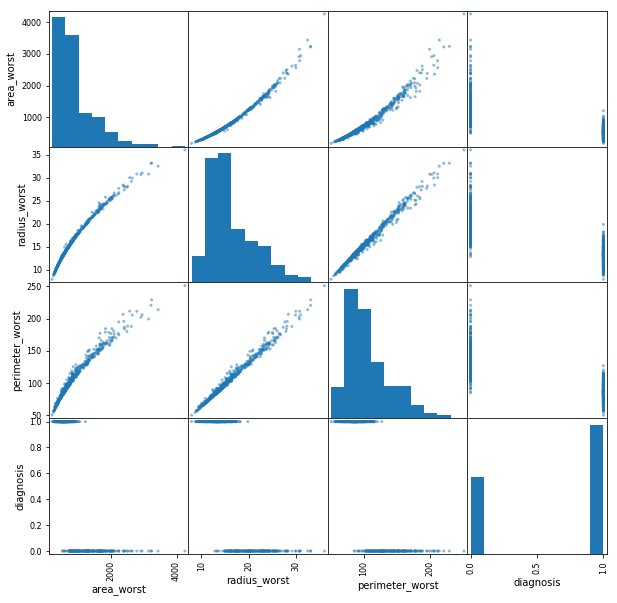

In [9]:
pd.plotting.scatter_matrix(df[['area_worst','radius_worst','perimeter_worst','diagnosis']],figsize=(10,10))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

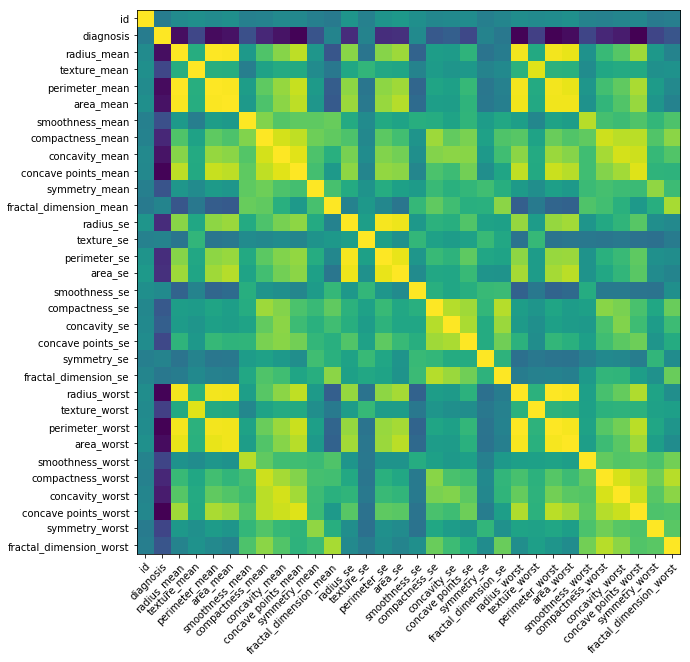

In [11]:
# pd.plotting.scatter_matrix(df[['diagnosis','radius_mean','texture_mean']])
# plt.matshow(df.corr(),fignum=plt.figure(figsize=(10, 10)).number)


fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(df.corr())
ax.set_xticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_yticks(np.arange(len(df.columns)))
ax.set_yticklabels(df.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# for i in range(len(df.columns)):
#     for j in range(len(df.columns)):
#         text = ax.text(j, i, df.corr()[i,j],ha="center", va="center", color="w")
        
# ax.set_title("Harv")
# fig.size(figsize=(20,20))
plt.show()


In [12]:
# ff = ['concavity_worst','smoothness_se','radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','fractal_dimension_worst','fractal_dimension_mean','fractal_dimension_se','perimeter_se','area_se','texture_worst','perimeter_worst','area_worst']
# ff_mean=['radius_mean','perimeter_mean','area_mean']
ff_worst = ['radius_worst','perimeter_worst','area_worst']

In [98]:
# x_train,x_test,y_train,y_test = train_test_split(df[['radius_worst','perimeter_worst','area_worst']],df.diagnosis)

# x_train,x_test,y_train,y_test = train_test_split(df[ff],df.diagnosis,random_state=5)

x_train,x_test,y_train,y_test = train_test_split(df[ff_worst],df.diagnosis)

In [99]:
log = LogisticRegression(penalty='l2',C=1,class_weight='balanced',random_state=3,solver='liblinear').fit(x_train,y_train)

In [100]:
y_pred = log.predict(x_test)


In [101]:
from sklearn.metrics import r2_score

In [102]:
r2score = r2_score(y_test,y_pred)
r2score

0.6757369614512472

In [103]:
confusion_matrix(y_test,y_pred)

array([[43,  2],
       [ 8, 90]], dtype=int64)

In [19]:
# plt.plot(df.area_worst,df.diagnosis,'bo',alpha=0.01)
# plt.plot(df.area_worst,y_pred+0.05,'ro',alpha=0.01)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from math import sqrt

In [21]:
dcs = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=40, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=4, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight='balanced', presort=True)

In [52]:
ff_worst = ['radius_mean','perimeter_mean','area_mean','radius_se','perimeter_se','area_se','radius_worst','perimeter_worst','area_worst','texture_worst']

x_train,x_test,y_train,y_test = train_test_split(df[ff_worst],df.diagnosis,random_state=5)
dcs = dcs.fit(x_train,y_train)

In [53]:
y_pred = dcs.predict(x_test)

In [54]:
r2_score(y_test,y_pred)

0.7636363636363637

In [116]:
confusion_matrix(y_test,y_pred)

array([[51,  3],
       [ 5, 84]], dtype=int64)

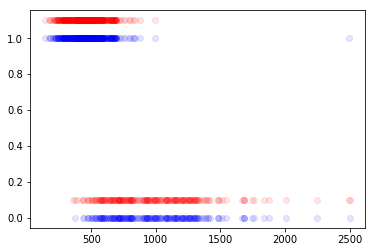

In [55]:
y_pred = dcs.predict(df[ff_worst])
plt.plot(df.area_mean,y_pred,'bo',alpha=0.1)
plt.plot(df.area_mean,np.array(df.diagnosis).reshape(-1,1)+0.1,'ro',alpha=0.1)


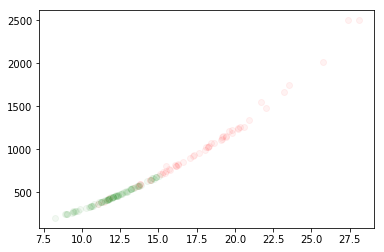

In [67]:
# dcs.predict(x_test[1:2])[0]
s=0
e=1
gg = []
x_test[s:e]
for i in y_test:
        yp = dcs.predict(x_test[s:e])
#     if i == yp:
#         plt.plot(x_test[s:e]['radius_mean'].values[0],i,'go',alpha=0.5)
#     else:
#         plt.plot(x_test[s:e]['radius_mean'].values[0],i,'mx',alpha=0.5)
        if i == 0:
            plt.plot(x_test[s:e]['radius_mean'].values[0],x_test[s:e]['area_mean'].values[0],'ro',alpha=0.05)
        else:
            plt.plot(x_test[s:e]['radius_mean'].values[0],x_test[s:e]['area_mean'].values[0],'go',alpha=0.05)
        s+=1
        e+=1
# plt.plot(df.radius_mean,y_pred+0.1,'bo',alpha=0.01)
# plt.plot(df.radius_mean,np.array(df.diagnosis).reshape(-1,1)+0.2,'ro',alpha=0.01)


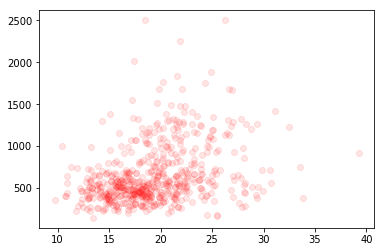

In [49]:
# plt.plot(df['concave points_worst'],df['concavity_worst'],'bo')

plt.plot(df.texture_mean,df.area_mean,'ro',alpha=0.1)

In [89]:
# ff=['area_mean','concavity_mean','area_se','concavity_worst','concavity_se','smoothness_worst']
ff=['texture_mean','area_mean','smoothness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','texture_se','area_se','smoothness_se','concavity_se','fractal_dimension_se','smoothness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst']

In [109]:
x_train,x_test,y_train,y_test = train_test_split(df[ff],df.diagnosis,random_state=42)

In [110]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(random_state=43)

In [111]:
rnd = rnd.fit(x_train,y_train)

C:\Users\PRINCE\Anaconda3\envs\Pandas\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [112]:
y_pred = rnd.predict(x_test)

In [113]:
r2_score(y_test,y_pred)

0.7619642114024137

In [115]:
confusion_matrix(y_test,y_pred)

array([[51,  3],
       [ 5, 84]], dtype=int64)